# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from apis_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=15)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=15)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 15


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | krasnozerskoye
Processing Record 6 of Set 1 | greymouth
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | belmonte
Processing Record 14 of Set 1 | christchurch
Processing Record 15 of Set 1 | ko lanta
-----------------------------
Data Retrieval Complete      
-----------------------------


In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          15
Lat           15
Lng           15
Max Temp      15
Humidity      15
Cloudiness    15
Wind Speed    15
Country       15
Date          15
dtype: int64

In [20]:
# Display sample data
city_data_df.head(14)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,19.15,74,100,12.56,PN,1719623833
1,albany,42.6001,-73.9662,18.74,56,100,0.45,US,1719623834
2,iqaluit,63.7506,-68.5145,6.85,65,75,2.57,CA,1719623836
3,grytviken,-54.2811,-36.5092,1.40,97,100,1.22,GS,1719623838
4,krasnozerskoye,53.9828,79.2374,23.84,78,46,3.57,RU,1719623840
5,greymouth,-42.4667,171.2000,12.11,77,32,1.71,NZ,1719623841
6,port lincoln,-34.7333,135.8667,13.05,64,100,8.98,AU,1719623843
7,klyuchi,52.2667,79.1667,25.17,64,35,2.25,RU,1719623845
8,tiksi,71.6872,128.8694,14.56,39,8,2.61,RU,1719623847
9,bilibino,68.0546,166.4372,17.50,55,100,1.52,RU,1719623849


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.15,74,100,12.56,PN,1719623833
1,albany,42.6001,-73.9662,18.74,56,100,0.45,US,1719623834
2,iqaluit,63.7506,-68.5145,6.85,65,75,2.57,CA,1719623836
3,grytviken,-54.2811,-36.5092,1.40,97,100,1.22,GS,1719623838
4,krasnozerskoye,53.9828,79.2374,23.84,78,46,3.57,RU,1719623840


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

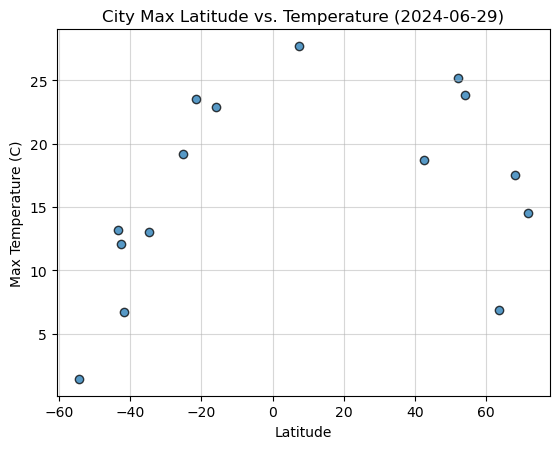

In [93]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(5.7,4.6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-29)")

# Incorporate the other graph properties
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

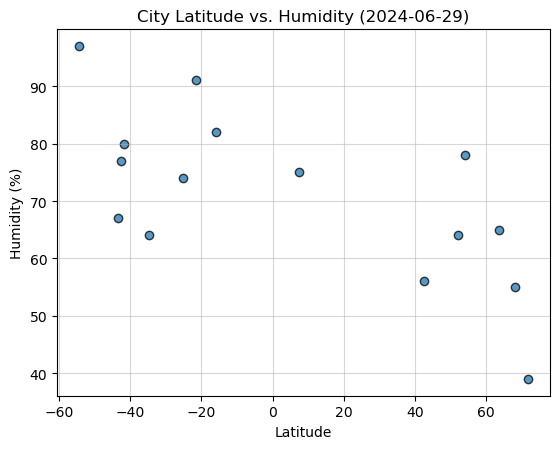

In [92]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(5.7,4.6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-06-29)")

# Incorporate the other graph properties
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

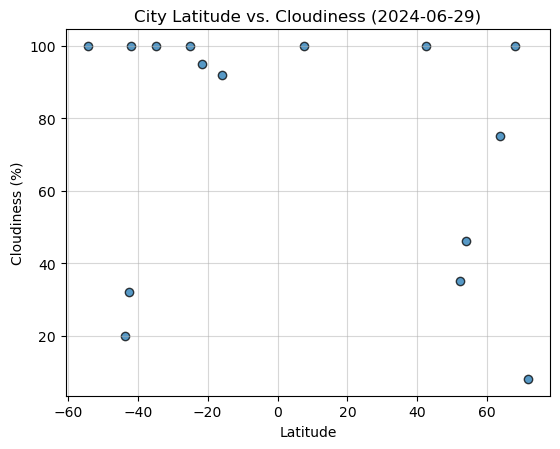

In [96]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(5.7,4.6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-06-29)")

# Incorporate the other graph properties
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

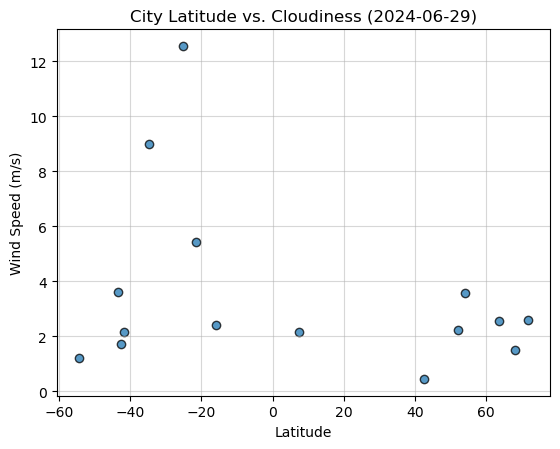

In [99]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(5.7,4.6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Cloudiness (2024-06-29)")

# Incorporate the other graph properties
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nicoya,10.1483,-85.4520,23.14,96,100,1.47,CR,1718609922
3,neftcala,39.3742,49.2472,29.82,54,0,4.61,AZ,1718609923
7,acapulco de juarez,16.8634,-99.8901,28.90,84,100,4.63,MX,1718609929
8,bethel,41.3712,-73.4140,15.92,87,0,1.54,US,1718609815
9,sandnessjoen,66.0217,12.6316,18.29,63,20,1.54,NO,1718609931


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,21.97,97,99,2.68,EC,1718609920
1,papatowai,-46.5619,169.4708,7.39,91,100,5.12,NZ,1718609921
4,ancud,-41.8697,-73.8203,10.80,82,97,9.88,CL,1718609925
5,port mathurin,-19.6833,63.4167,23.99,79,6,2.87,MU,1718609927
6,port-aux-francais,-49.3500,70.2167,3.59,82,54,15.45,TF,1718609928


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.39994946012183763


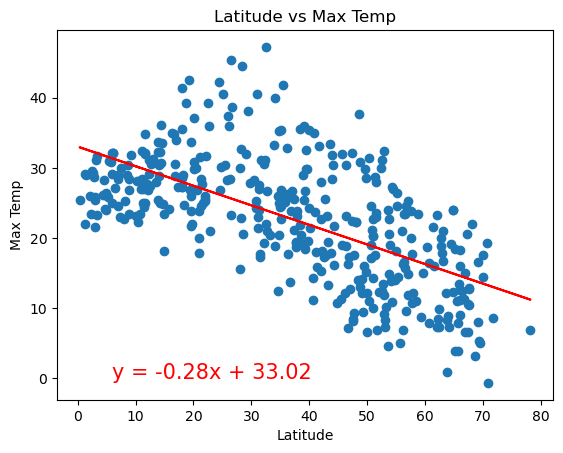

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.5828302644085626


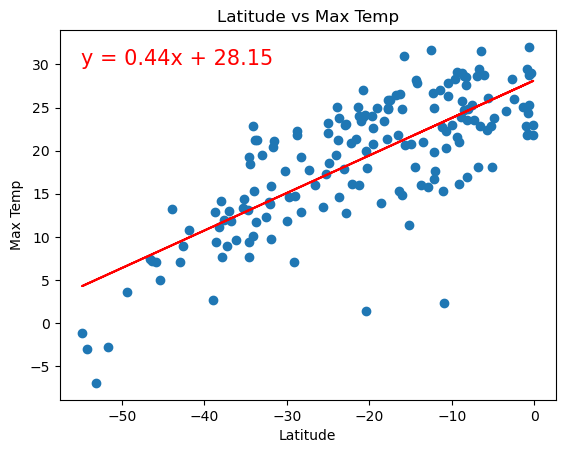

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.005072410242654756


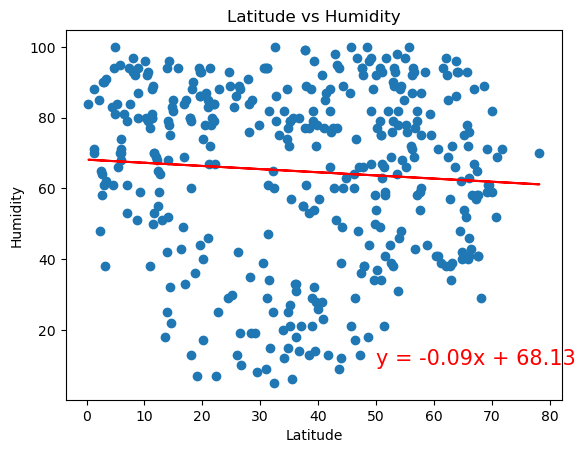

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.0008746520732592251


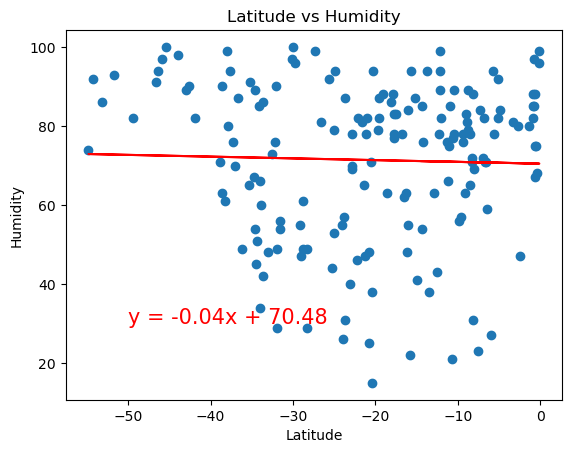

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0062197970047544295


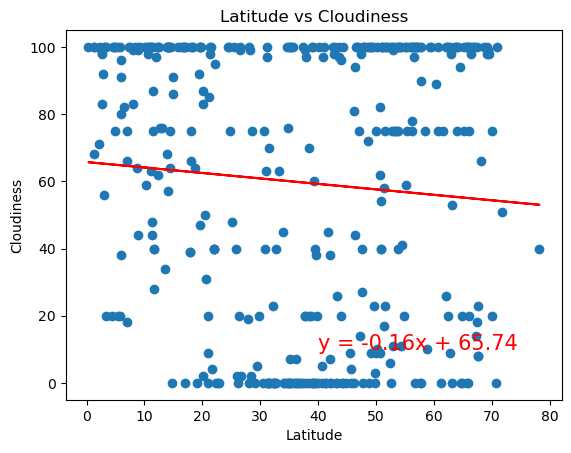

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.03622045202756042


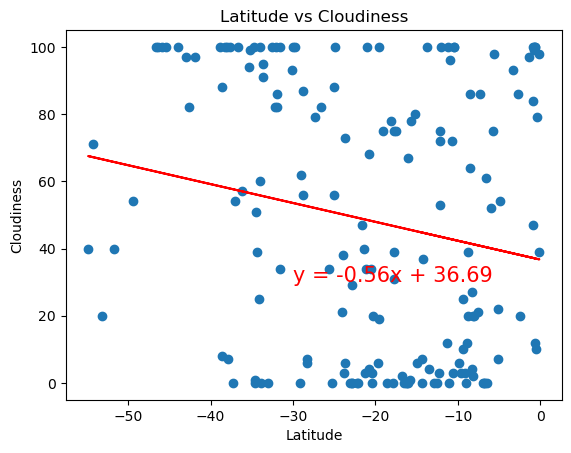

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.012275669442166017


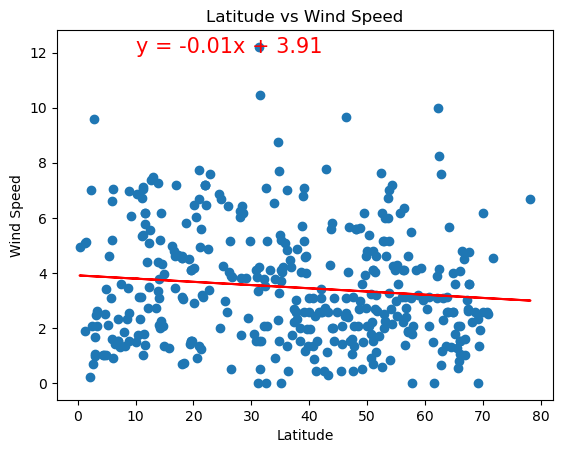

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.010198739304669231


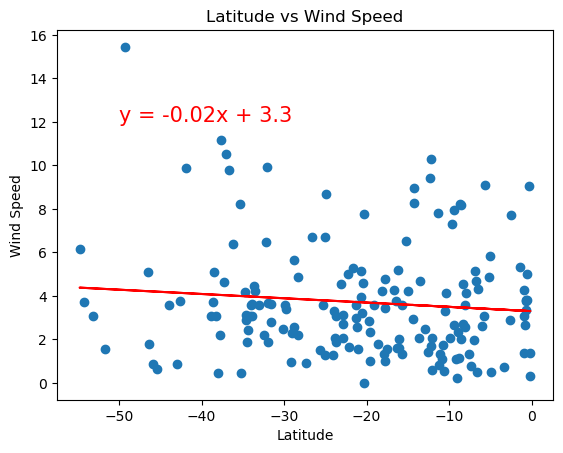

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE